In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
train=pd.read_csv('train.csv',sep=';')
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
test=pd.read_csv('test.csv',sep=';')
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
train.shape

(45211, 17)

In [5]:
test.shape

(4521, 17)

In [6]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
print(train.dtypes)


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [9]:
print(test.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


# Null Values

In [10]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Duplicate 

In [11]:
train.duplicated().sum()

0

# Seperating Categorical and Numerical Columns

In [12]:
cat=train.dtypes[train.dtypes=='object'].index
num=train.dtypes[train.dtypes!='object'].index
print(cat)
print(num)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


#EDA


In [13]:
#univariate

In [14]:
cat=train.dtypes[train.dtypes=='object'].index
cat1=test.dtypes[test.dtypes=='object'].index

In [15]:
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

<Axes: >

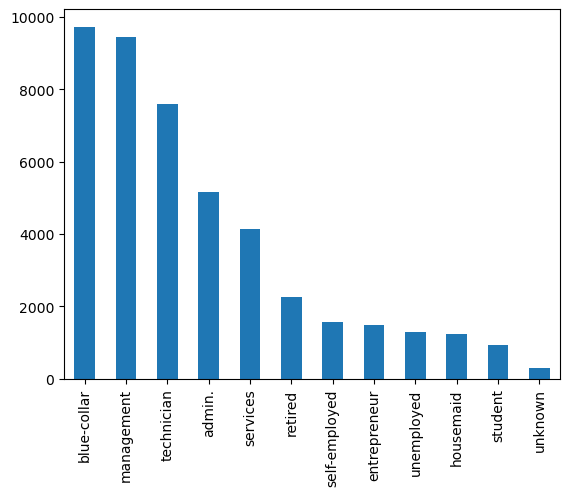

In [16]:
train['job'].value_counts().plot(kind='bar')

<Axes: >

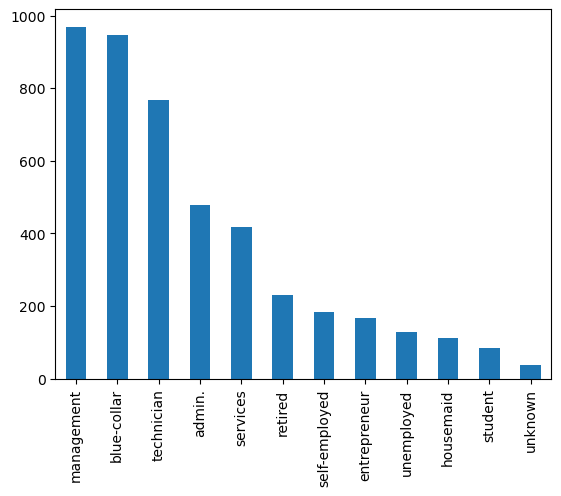

In [17]:
test['job'].value_counts().plot(kind='bar')

In [18]:
train['job']=train['job'].replace(['admin.','services'],'white_collar')
test['job']=test['job'].replace(['admin.','services'],'white_collar')


In [19]:
train['job']=train['job'].replace(['self-employed','entrepreneur'],'busnessman')
test['job']=test['job'].replace(['self-employed','entrepreneur'],'busnessman')

In [20]:
train['job']=train['job'].replace(['retired','student','unknown','unemployed'],'other')
test['job']=test['job'].replace(['retired','student','unknown','unemployed'],'other')

<Axes: >

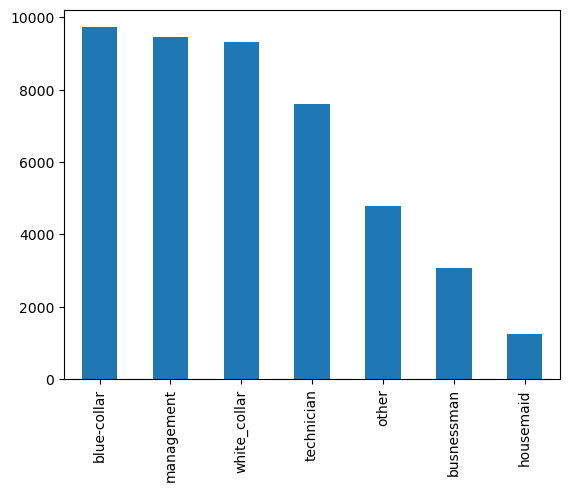

In [21]:
train['job'].value_counts().plot(kind='bar')

<Axes: >

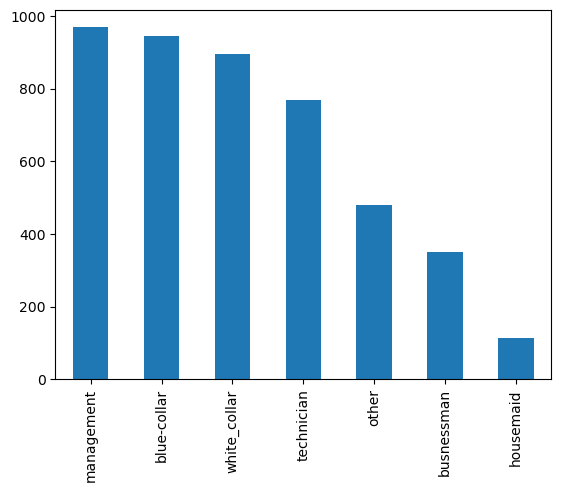

In [22]:
test['job'].value_counts().plot(kind='bar')

<Axes: >

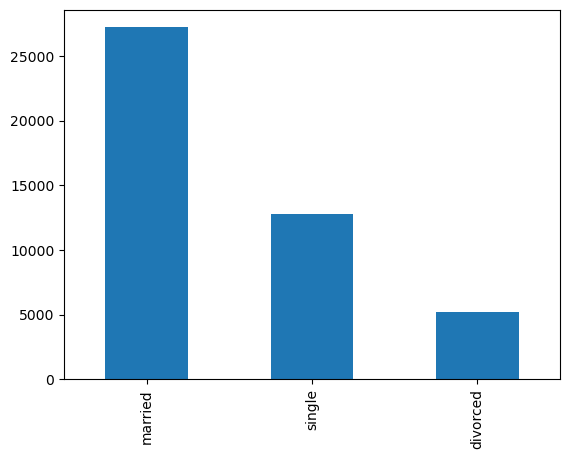

In [23]:
train['marital'].value_counts().plot(kind='bar')

<Axes: >

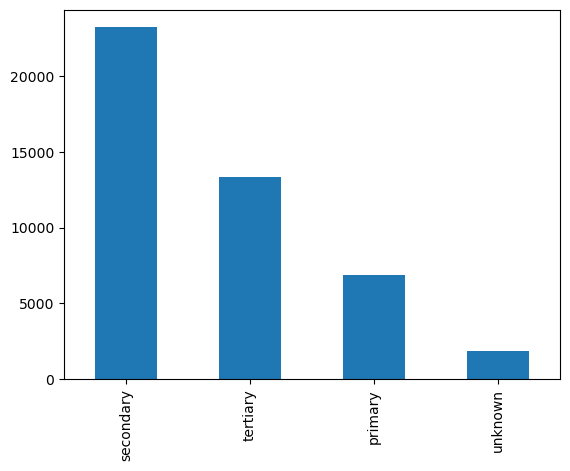

In [24]:
train['education'].value_counts().plot(kind='bar')

<Axes: >

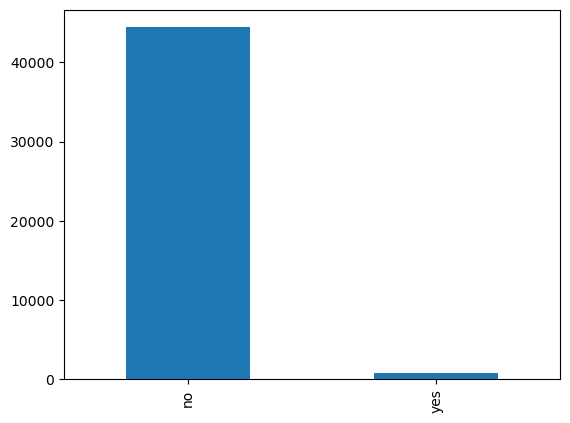

In [25]:
train['default'].value_counts().plot(kind='bar')

In [26]:
train['default']=np.where(train['default']=='no',0,1)
test['default']=np.where(test['default']=='no',0,1)

In [27]:
train['default'].sample(5)

2242     0
2754     1
5000     0
4102     0
22463    0
Name: default, dtype: int32

In [28]:
test['default'].sample(5)

4018    0
1065    0
3120    0
1340    0
1109    0
Name: default, dtype: int32

<Axes: >

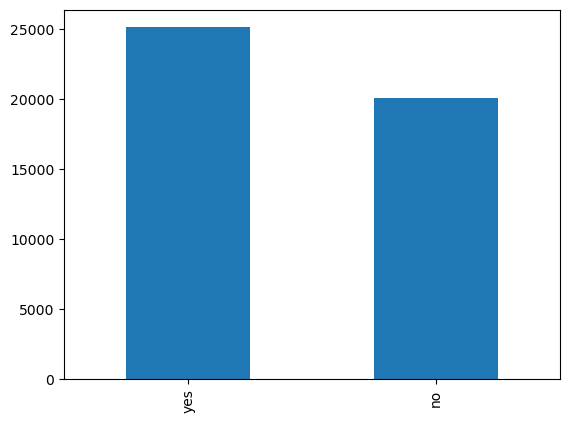

In [29]:
train['housing'].value_counts().plot(kind='bar')

In [30]:
train['housing']=np.where(train['housing']=='no',0,1)
test['housing']=np.where(test['housing']=='no',0,1)

In [31]:
test['housing'].sample(7)

3562    0
3396    1
1185    1
1053    1
1191    1
4048    1
1037    1
Name: housing, dtype: int32

In [32]:
train['housing'].sample(5)

15517    1
6673     1
29627    0
25428    1
31404    1
Name: housing, dtype: int32

<Axes: >

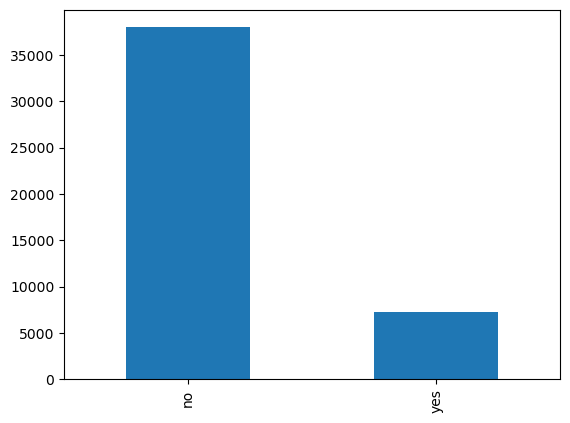

In [33]:
train['loan'].value_counts().plot(kind='bar')

In [34]:
train['loan']=np.where(train['loan']=='no',0,1)
test['loan']=np.where(test['loan']=='no',0,1)

In [35]:
train['loan'].sample(5)

4833     0
16961    1
21214    0
36096    0
8424     0
Name: loan, dtype: int32

In [36]:
test['loan'].sample(5)

852     0
3598    0
3745    0
1925    0
4261    1
Name: loan, dtype: int32

<Axes: >

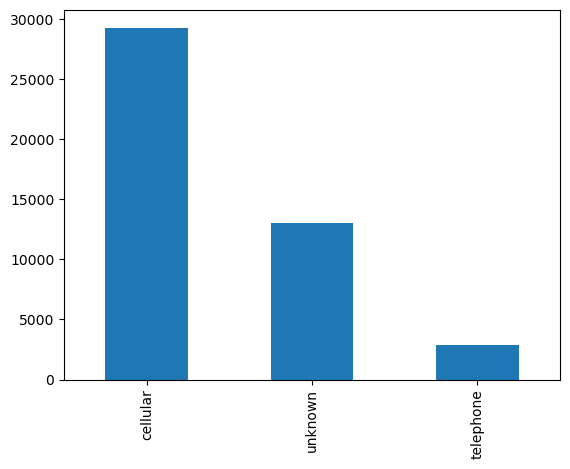

In [37]:
train['contact'].value_counts().plot(kind='bar')

In [38]:
train.drop(columns=['contact','day','month'],axis=1,inplace=True)
test.drop(columns=['contact','day','month'],axis=1,inplace=True)

<Axes: >

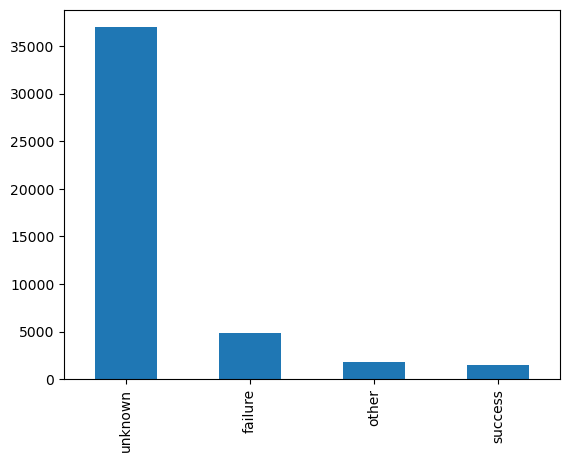

In [39]:
train['poutcome'].value_counts().plot(kind='bar')

In [40]:
train['poutcome']=train['poutcome'].replace(['unknown','other'],'other1')
test['poutcome']=test['poutcome'].replace(['unknown','other'],'other1')

<Axes: >

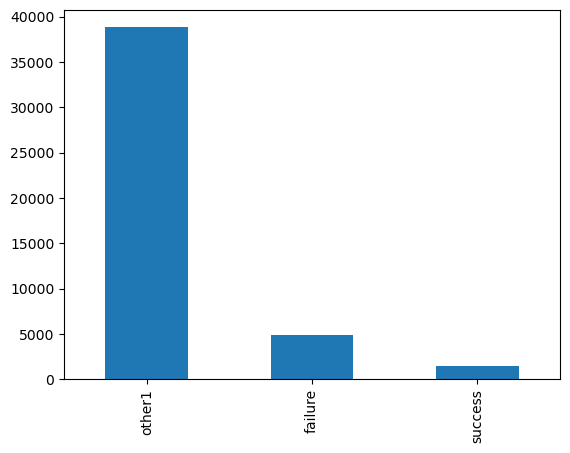

In [41]:
train['poutcome'].value_counts().plot(kind='bar')

<Axes: >

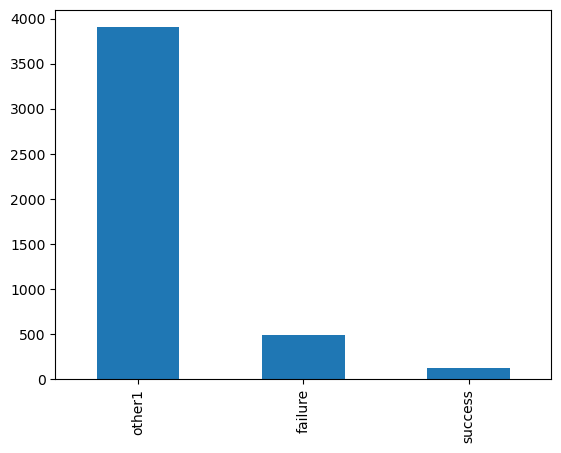

In [42]:
test['poutcome'].value_counts().plot(kind='bar')

In [43]:
train['y']=np.where(train['y']=='no',0,1)
test['y']=np.where(test['y']=='no',0,1)

In [44]:
train.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,261,1,-1,0,other1,0
1,44,technician,single,secondary,0,29,1,0,151,1,-1,0,other1,0
2,33,busnessman,married,secondary,0,2,1,1,76,1,-1,0,other1,0
3,47,blue-collar,married,unknown,0,1506,1,0,92,1,-1,0,other1,0
4,33,other,single,unknown,0,1,0,0,198,1,-1,0,other1,0


In [45]:
test.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,30,other,married,primary,0,1787,0,0,79,1,-1,0,other1,0
1,33,white_collar,married,secondary,0,4789,1,1,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,199,4,-1,0,other1,0
4,59,blue-collar,married,secondary,0,0,1,0,226,1,-1,0,other1,0


In [46]:
num=train.dtypes[train.dtypes!='object'].index
num1=test.dtypes[test.dtypes!='object'].index

In [47]:
num

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'y'],
      dtype='object')

In [48]:
train.describe(percentiles=[.01,.02,.05,.1,.25,.5,.75,.9,.95, .96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,45211.0,40.936210,10.618762,18.0,23.0,25.0,27.0,29.0,33.0,39.0,48.0,56.0,59.0,59.0,60.0,63.0,71.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,-627.0,-435.0,-172.0,0.0,72.0,448.0,1428.0,3574.0,5768.0,6572.6,7777.9,9439.4,13164.9,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
duration,45211.0,258.163080,257.527812,0.0,11.0,16.0,35.0,58.0,103.0,180.0,319.0,548.0,751.0,823.0,914.7,1051.0,1269.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,5.0,8.0,8.0,10.0,12.0,16.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,185.0,317.0,337.0,349.0,360.0,370.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,6.0,8.9,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [49]:
train.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,261,1,-1,0,other1,0
1,44,technician,single,secondary,0,29,1,0,151,1,-1,0,other1,0
2,33,busnessman,married,secondary,0,2,1,1,76,1,-1,0,other1,0
3,47,blue-collar,married,unknown,0,1506,1,0,92,1,-1,0,other1,0
4,33,other,single,unknown,0,1,0,0,198,1,-1,0,other1,0


In [50]:
train.loc[train['pdays']==-1,'pdays']=999

train['recent_days']=1/train['pdays']

train.drop(columns=['pdays'],inplace = True)

In [51]:
test.loc[test['pdays']==-1,'pdays']=999

test['recent_days']=1/test['pdays']

test.drop(columns=['pdays'],inplace = True)

In [52]:
train.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y,recent_days
0,58,management,married,tertiary,0,2143,1,0,261,1,0,other1,0,0.001001
1,44,technician,single,secondary,0,29,1,0,151,1,0,other1,0,0.001001
2,33,busnessman,married,secondary,0,2,1,1,76,1,0,other1,0,0.001001
3,47,blue-collar,married,unknown,0,1506,1,0,92,1,0,other1,0,0.001001
4,33,other,single,unknown,0,1,0,0,198,1,0,other1,0,0.001001


In [53]:
test.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y,recent_days
0,30,other,married,primary,0,1787,0,0,79,1,0,other1,0,0.001001
1,33,white_collar,married,secondary,0,4789,1,1,220,1,4,failure,0,0.002950
2,35,management,single,tertiary,0,1350,1,0,185,1,1,failure,0,0.003030
3,30,management,married,tertiary,0,1476,1,1,199,4,0,other1,0,0.001001
4,59,blue-collar,married,secondary,0,0,1,0,226,1,0,other1,0,0.001001


# Bivariate

In [54]:
#Cat-cat

In [55]:
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [56]:
pd.crosstab(train["job"], train["education"])

education,primary,secondary,tertiary,unknown
job,,,,
blue-collar,3758,5371,149,454
busnessman,313,1119,1519,115
housemaid,627,395,173,45
management,294,1121,7801,242
other,1147,2291,917,438
technician,158,5229,1968,242
white_collar,554,7676,774,321


In [57]:
pd.crosstab(train["job"], train["marital"])

marital,divorced,married,single
job,,,
blue-collar,750,6968,2014
busnessman,319,2063,684
housemaid,184,912,144
management,1111,5400,2947
other,619,2719,1455
technician,925,4052,2620
white_collar,1299,5100,2926


# cat-num

In [58]:
num

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'y'],
      dtype='object')

In [59]:
train.groupby(["education"]).agg({"balance":
                                    ["min", "max", "mean", "median",
                                     "std", "count"]})

balance                                                
              min     max         mean median          std  count
education                                                        
primary     -2604   71188  1250.949934  403.0  2690.743991   6851
secondary   -8019   81204  1154.880786  392.0  2558.256739  23202
tertiary    -6847  102127  1758.416435  577.0  3839.088305  13301
unknown     -1445   64343  1526.754443  568.0  3152.228273   1857

In [60]:
train.groupby(["education"]).agg({"age":
                                    ["min", "max", "mean", "median",
                                     "std", "count"]})

age                                        
          min max       mean median        std  count
education                                            
primary    18  95  45.865567   45.0  11.401980   6851
secondary  18  95  39.964270   38.0  10.159568  23202
tertiary   20  89  39.593640   37.0   9.887923  13301
unknown    18  93  44.510501   45.0  12.196400   1857

# num-num

In [61]:
train[["balance", "duration"]].corr()

,balance,duration
balance,1.00000,0.02156
duration,0.02156,1.00000


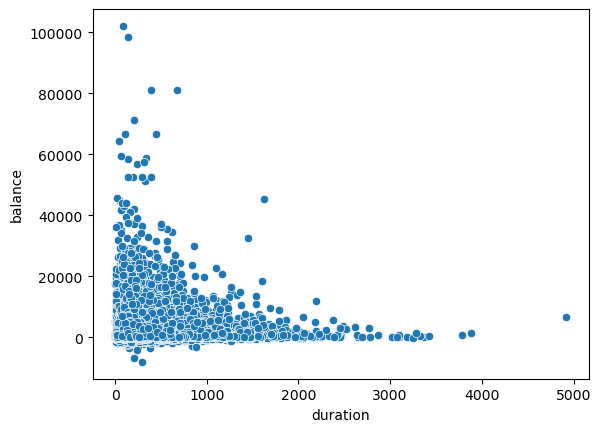

In [62]:
sns.scatterplot(data=train, y="balance", x="duration")
plt.show()

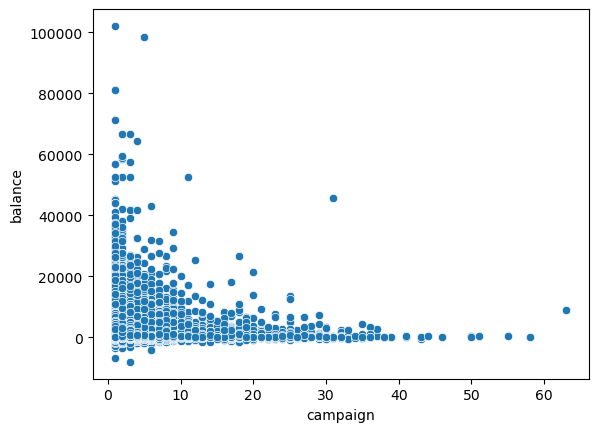

In [63]:
sns.scatterplot(data=train, y="balance", x="campaign")
plt.show()

# pairplot

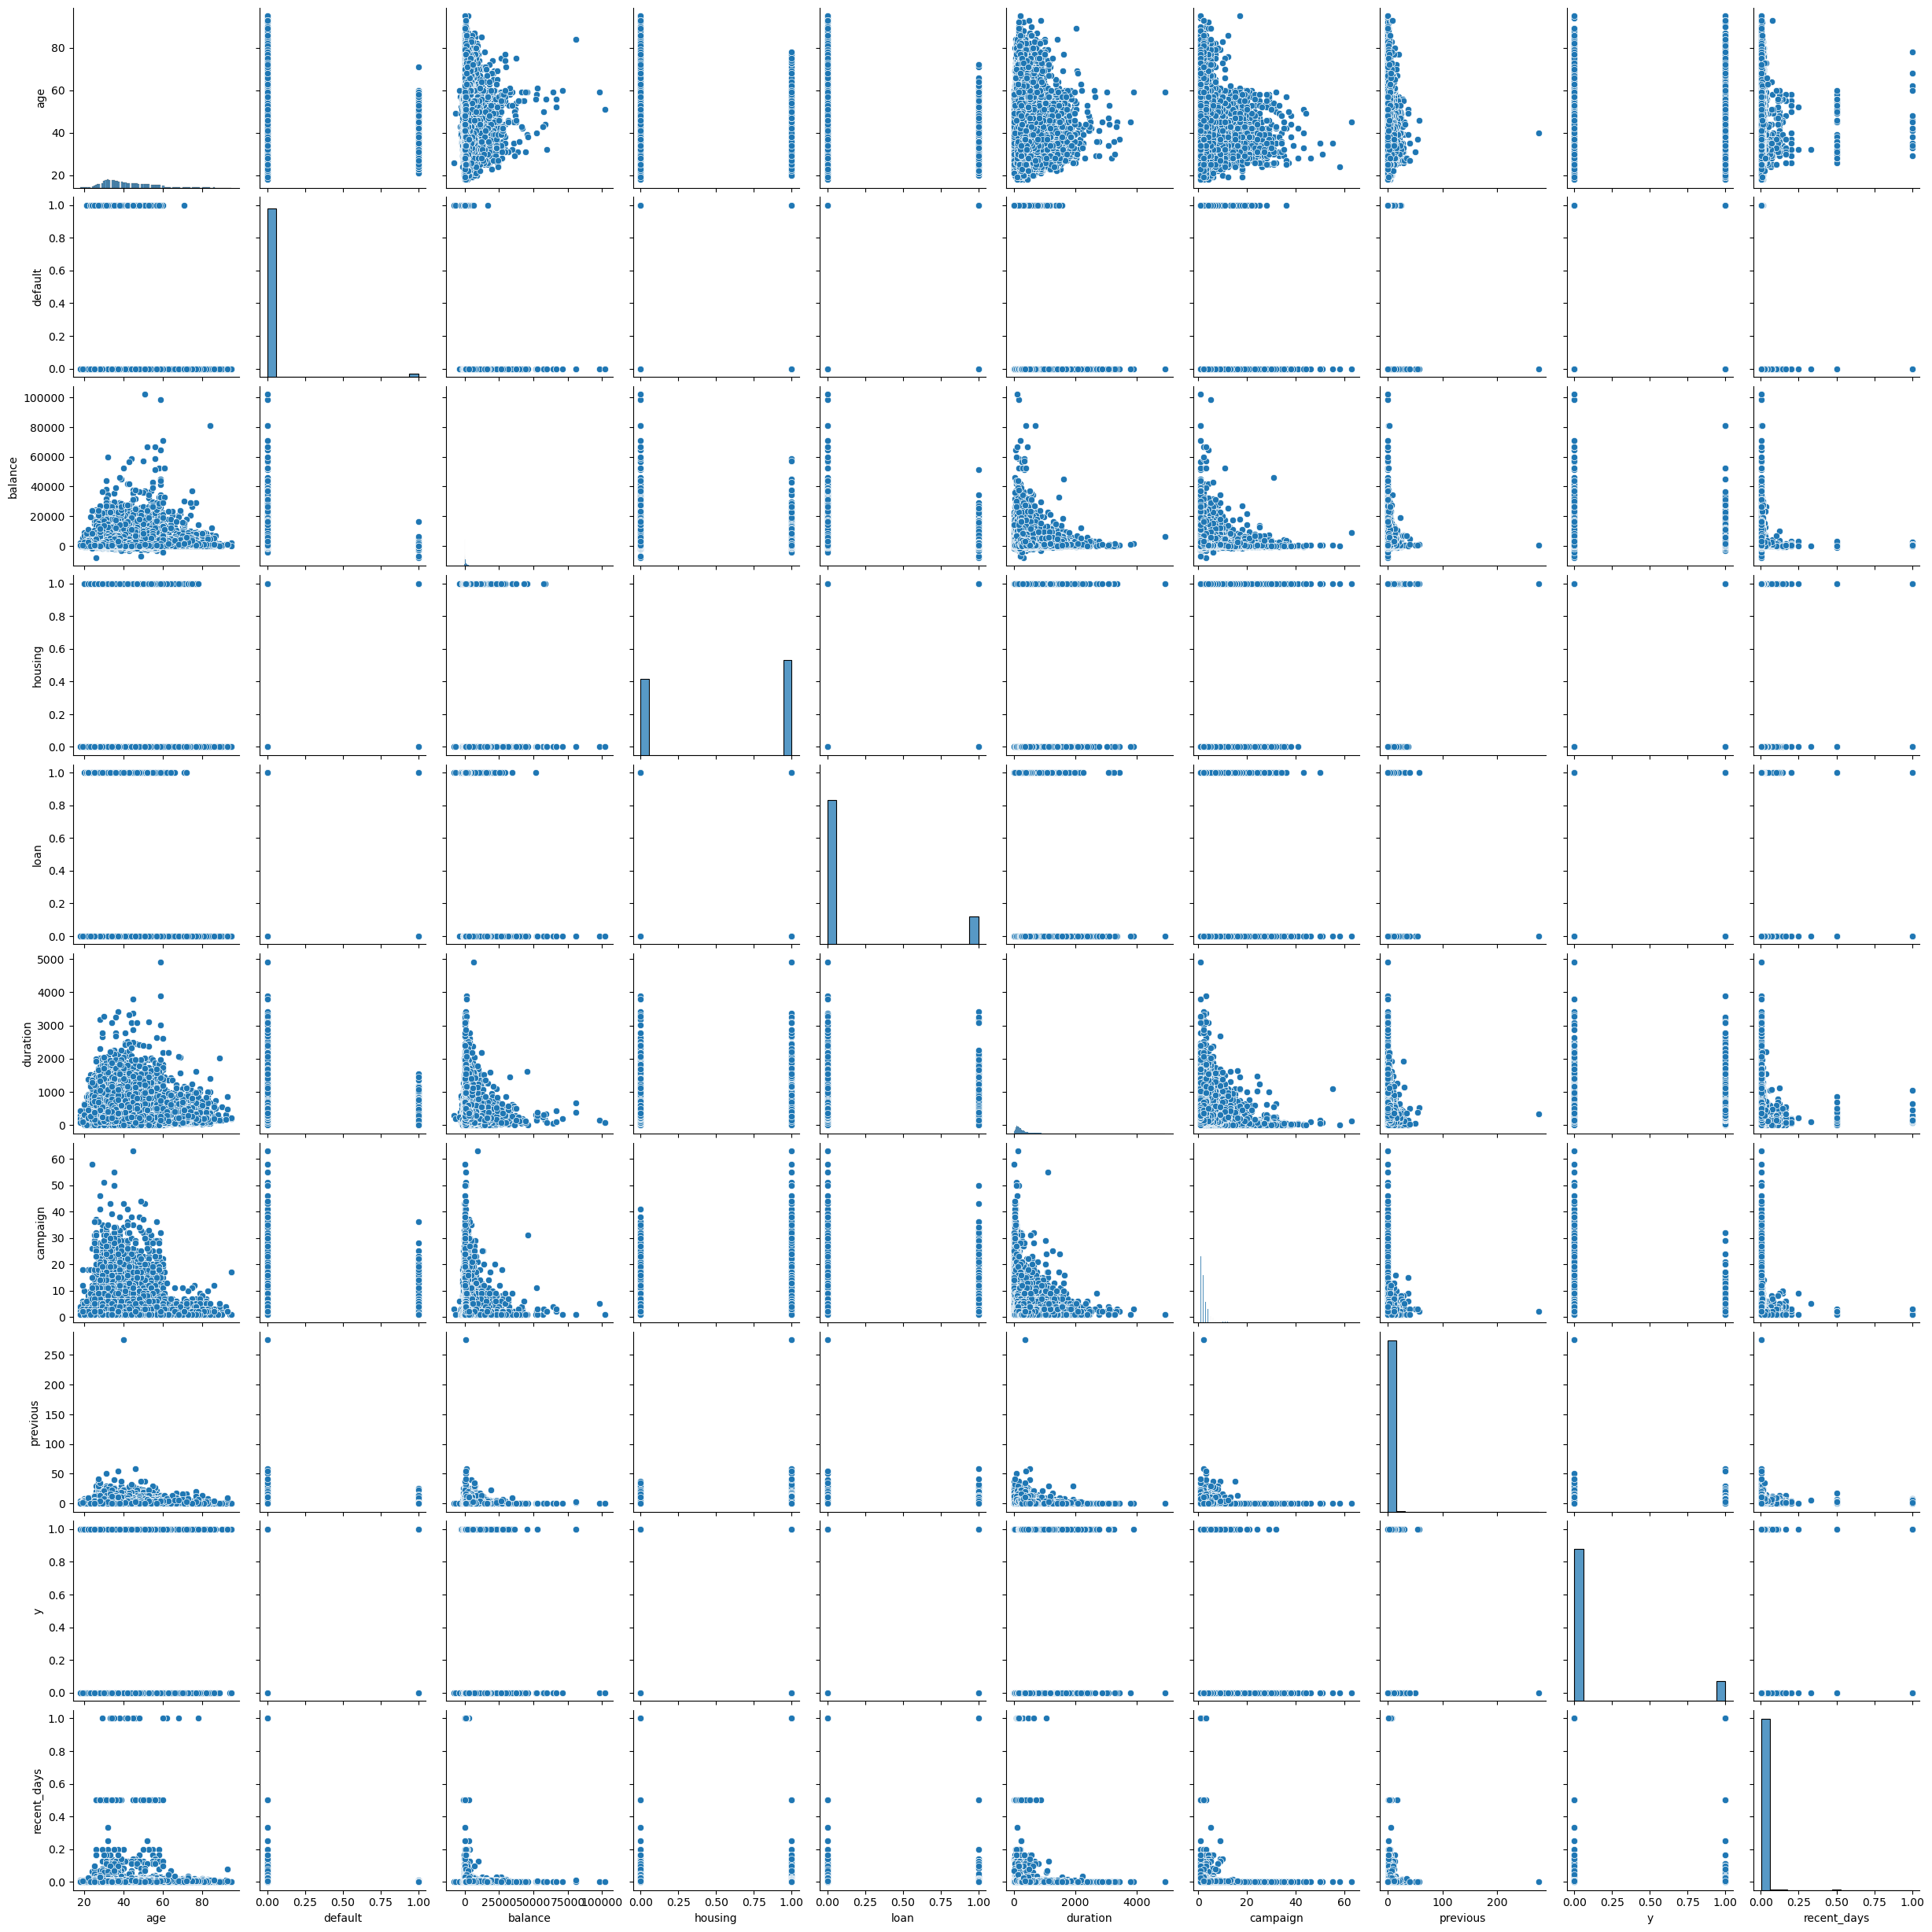

In [64]:
sns.pairplot(train)
plt.show()

# Correlation

C:\Users\Dell\AppData\Local\Temp\ipykernel_280\1800383264.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


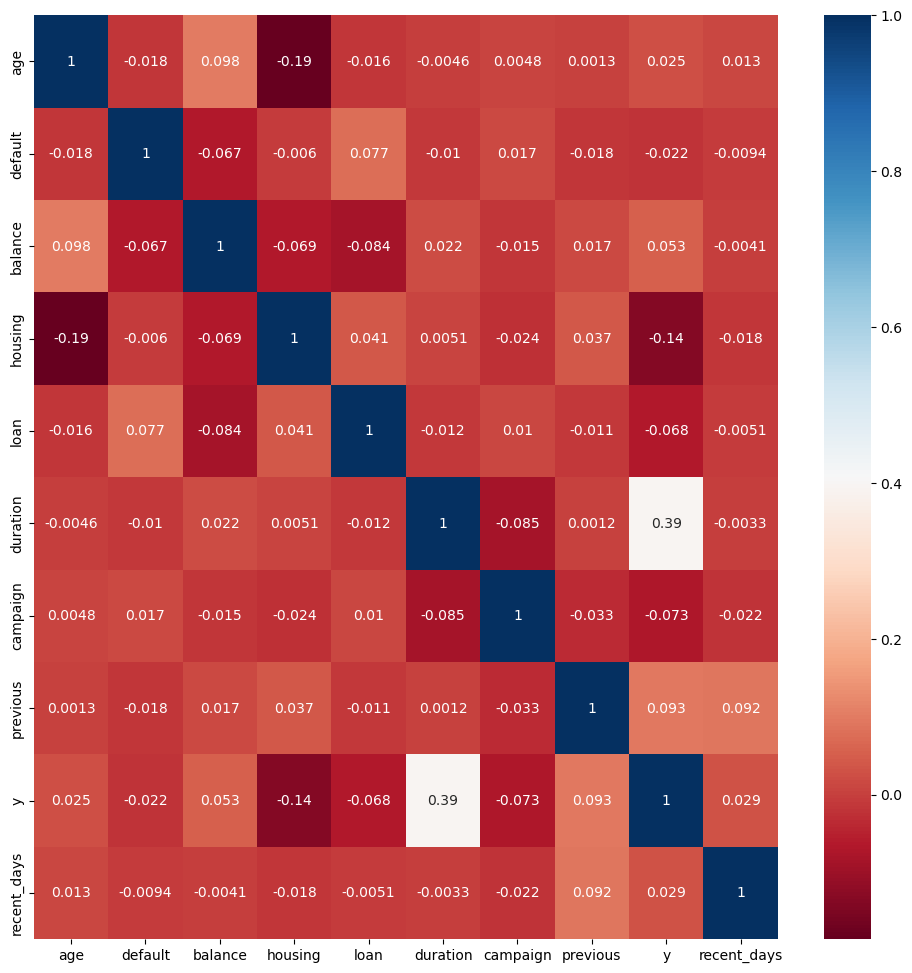

In [65]:
corr = train.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

# Outlier Treatment

In [66]:
num

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'y'],
      dtype='object')

In [67]:
train.describe(percentiles=[.01,.02,.05,.97,.98,.99]).T

,count,mean,std,min,1%,2%,5%,50%,97%,98%,99%,max
age,45211.0,40.936210,10.618762,18.000000,23.000000,25.000000,27.000000,39.000000,60.000000,63.00000,71.000000,95.0
default,45211.0,0.018027,0.133049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.0
balance,45211.0,1362.272058,3044.765829,-8019.000000,-627.000000,-435.000000,-172.000000,448.000000,7777.900000,9439.40000,13164.900000,102127.0
housing,45211.0,0.555838,0.496878,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.0
loan,45211.0,0.160226,0.366820,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.0
duration,45211.0,258.163080,257.527812,0.000000,11.000000,16.000000,35.000000,180.000000,914.700000,1051.00000,1269.000000,4918.0
campaign,45211.0,2.763841,3.098021,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,12.00000,16.000000,63.0
previous,45211.0,0.580323,2.303441,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.00000,8.900000,275.0
y,45211.0,0.116985,0.321406,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.0
recent_days,45211.0,0.002903,0.024067,0.001001,0.001001,0.001001,0.001001,0.001001,0.010204,0.01087,0.012195,1.0


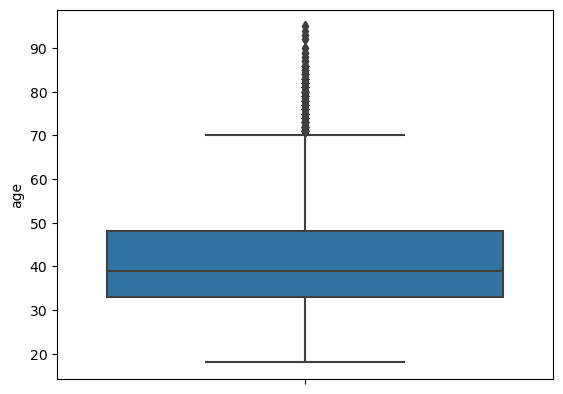

In [68]:
sns.boxplot(data=train,y='age')
plt.show()


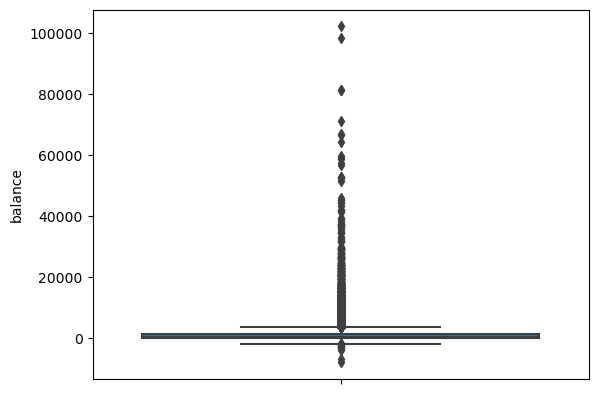

In [69]:
sns.boxplot(data=train,y='balance')
plt.show()


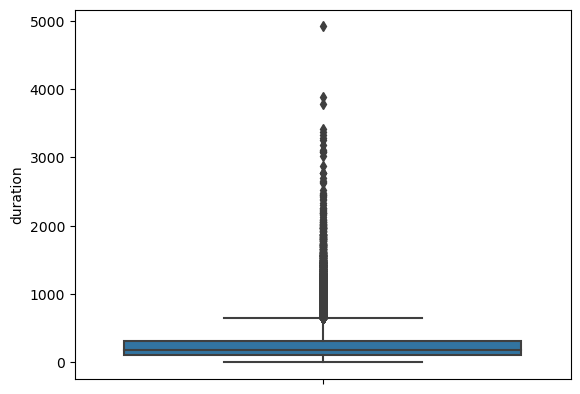

In [70]:
sns.boxplot(data=train,y='duration')
plt.show()


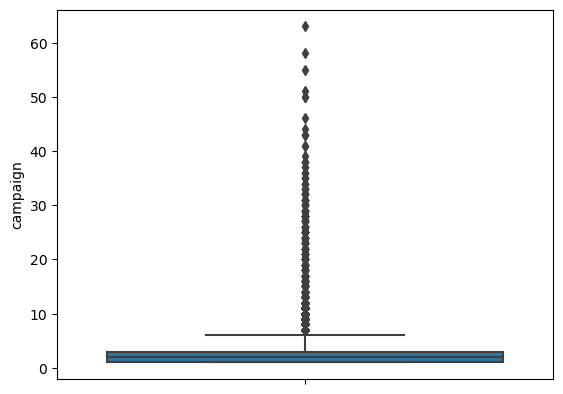

In [71]:
sns.boxplot(data=train,y='campaign')
plt.show()


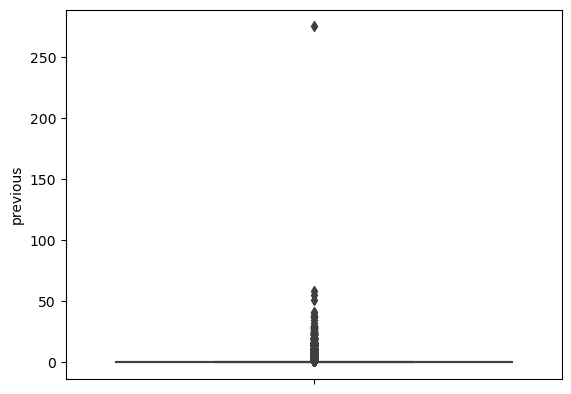

In [72]:
sns.boxplot(data=train,y='previous')
plt.show()


In [73]:
train_num_col = train[train.dtypes[train.dtypes!='object'].index]

train_cat_col = train[train.dtypes[train.dtypes=='object'].index]

In [74]:
def myoutlier_percentiles(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [75]:
train_num_col = train_num_col.apply(myoutlier_percentiles)

In [76]:
df1 = pd.concat([train_cat_col, train_num_col],axis=1)


In [77]:
df1.describe(percentiles=[.01,.02,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,50%,96%,97%,98%,99%,max
age,45211.0,40.887660,10.384267,23.000000,23.000000,25.000000,39.000000,59.000000,60.000000,63.00000,71.000000,71.000000
default,45211.0,0.018027,0.133049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
balance,45211.0,1278.121689,2249.406970,-627.000000,-627.000000,-435.000000,448.000000,6572.600000,7777.900000,9439.40000,13164.810000,13164.900000
housing,45211.0,0.555838,0.496878,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
loan,45211.0,0.160226,0.366820,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000
duration,45211.0,254.375993,234.779511,11.000000,11.000000,16.000000,180.000000,823.000000,914.700000,1051.00000,1269.000000,1269.000000
campaign,45211.0,2.691403,2.585740,1.000000,1.000000,1.000000,2.000000,8.000000,10.000000,12.00000,16.000000,16.000000
previous,45211.0,0.524689,1.457817,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,6.00000,8.810000,8.900000
y,45211.0,0.116985,0.321406,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000
recent_days,45211.0,0.001868,0.002259,0.001001,0.001001,0.001001,0.001001,0.008696,0.010204,0.01087,0.012195,0.012195


In [78]:
df1.head()

,job,marital,education,poutcome,age,default,balance,housing,loan,duration,campaign,previous,y,recent_days
0,management,married,tertiary,other1,58,0,2143.0,1,0,261,1,0.0,0,0.001001
1,technician,single,secondary,other1,44,0,29.0,1,0,151,1,0.0,0,0.001001
2,busnessman,married,secondary,other1,33,0,2.0,1,1,76,1,0.0,0,0.001001
3,blue-collar,married,unknown,other1,47,0,1506.0,1,0,92,1,0.0,0,0.001001
4,other,single,unknown,other1,33,0,1.0,0,0,198,1,0.0,0,0.001001


# Using get dummies

In [79]:
df1.head()

,job,marital,education,poutcome,age,default,balance,housing,loan,duration,campaign,previous,y,recent_days
0,management,married,tertiary,other1,58,0,2143.0,1,0,261,1,0.0,0,0.001001
1,technician,single,secondary,other1,44,0,29.0,1,0,151,1,0.0,0,0.001001
2,busnessman,married,secondary,other1,33,0,2.0,1,1,76,1,0.0,0,0.001001
3,blue-collar,married,unknown,other1,47,0,1506.0,1,0,92,1,0.0,0,0.001001
4,other,single,unknown,other1,33,0,1.0,0,0,198,1,0.0,0,0.001001


In [80]:
train1_dum = pd.get_dummies(df1,columns = ['job','marital','education','poutcome'],drop_first=True)


# VIF : Variance inflation factor 

In [81]:
train1_dum.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'previous', 'y', 'recent_days', 'job_busnessman', 'job_housemaid',
       'job_management', 'job_other', 'job_technician', 'job_white_collar',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_other1',
       'poutcome_success'],
      dtype='object')

In [82]:
fg=train1_dum[['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'previous', 'y', 'recent_days', 'job_busnessman', 'job_housemaid',
       'job_management', 'job_other', 'job_technician', 'job_white_collar',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_other1',
       'poutcome_success' ]]

In [104]:
fg['default'].unique()

array([0, 1])

In [105]:
fg.head()

,age,default,balance,housing,loan,duration,campaign,previous,y,recent_days,...,job_other,job_technician,job_white_collar,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other1,poutcome_success
0,58,0,2143.0,1,0,261,1,0.0,0,0.001001,...,0,0,0,1,0,0,1,0,1,0
1,44,0,29.0,1,0,151,1,0.0,0,0.001001,...,0,1,0,0,1,1,0,0,1,0
2,33,0,2.0,1,1,76,1,0.0,0,0.001001,...,0,0,0,1,0,1,0,0,1,0
3,47,0,1506.0,1,0,92,1,0.0,0,0.001001,...,0,0,0,1,0,0,0,1,1,0
4,33,0,1.0,0,0,198,1,0.0,0,0.001001,...,1,0,0,0,1,0,0,1,1,0


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame() 
vif['VIF'] = [variance_inflation_factor(fg.values, i) for i in range(fg.shape[1])]
vif['variable'] = fg.columns
vif.sort_values(by=["VIF"], ascending=False, inplace=True)
vif

,VIF,variable
0,13.724979,age
21,11.767724,poutcome_other1
16,5.402610,marital_married
18,4.829834,education_secondary
19,4.485216,education_tertiary
9,3.818129,recent_days
12,3.300504,job_management
17,3.045722,marital_single
5,2.624869,duration
3,2.327908,housing


# select X and Y

In [84]:
x = train1_dum.drop(['y'],axis=1)
y = train1_dum['y']
print(x.shape)
print(y.shape)

(45211, 22)
(45211,)


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 22)
(13564, 22)
(31647,)
(13564,)


# Function to evaluate model

In [87]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},index=[mname])
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
    return res_df

# LogisticRegression

In [88]:
lr1 = LogisticRegression(max_iter=100000)
lr_res = eval_model(lr1,x_train,y_train,x_test,y_test,'LogReg')

Confusion_Matrix
 [[11649   317]
 [ 1048   550]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.63      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



In [89]:
train['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

# Applying  SMOTE

In [90]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=42)

In [92]:
lr2 = LogisticRegression(max_iter=100000)
lr_res2 = eval_model(lr2,x_train,y_train,x_test,y_test,'LogReg')

Confusion_Matrix
 [[8949 1000]
 [1171 8841]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      9949
           1       0.90      0.88      0.89     10012

    accuracy                           0.89     19961
   macro avg       0.89      0.89      0.89     19961
weighted avg       0.89      0.89      0.89     19961



# DecisionTree

In [93]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_split=15)
dt_res = eval_model(dt,x_train,y_train,x_test,y_test,'DTree')
dt_res

Confusion_Matrix
 [[8940 1009]
 [ 993 9019]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      9949
           1       0.90      0.90      0.90     10012

    accuracy                           0.90     19961
   macro avg       0.90      0.90      0.90     19961
weighted avg       0.90      0.90      0.90     19961



,Train_Acc,Test_Acc
DTree,0.926891,0.899704


# Random Forest

In [94]:
rf = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=12,min_samples_split=15)
rf_res = eval_model(rf,x_train,y_train,x_test,y_test,'Random Forest')
rf_res

Confusion_Matrix
 [[9093  856]
 [ 930 9082]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      9949
           1       0.91      0.91      0.91     10012

    accuracy                           0.91     19961
   macro avg       0.91      0.91      0.91     19961
weighted avg       0.91      0.91      0.91     19961



,Train_Acc,Test_Acc
Random Forest,0.927442,0.910526


In [95]:
# Importing Performance Metrics:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(x_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7795785612338847
0.05510481076989017


# KNN

In [97]:
knn = KNeighborsClassifier(n_neighbors=15)
knn_res = eval_model(knn,x_train,y_train,x_test,y_test,'KNN')

Confusion_Matrix
 [[7248 2701]
 [1028 8984]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.73      0.80      9949
           1       0.77      0.90      0.83     10012

    accuracy                           0.81     19961
   macro avg       0.82      0.81      0.81     19961
weighted avg       0.82      0.81      0.81     19961



# Ada Boost

In [98]:
ada = AdaBoostClassifier(n_estimators=70)  # depth of tree = 1
ada_res = eval_model(ada,x_train,y_train,x_test,y_test,'AdaBoost')
ada_res

Confusion_Matrix
 [[8970  979]
 [1053 8959]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      9949
           1       0.90      0.89      0.90     10012

    accuracy                           0.90     19961
   macro avg       0.90      0.90      0.90     19961
weighted avg       0.90      0.90      0.90     19961



,Train_Acc,Test_Acc
AdaBoost,0.901658,0.898201


In [99]:
all_res = pd.concat([lr_res,lr_res2,knn_res,dt_res,rf_res,ada_res])
all_res

,Train_Acc,Test_Acc
LogReg,0.899295,0.899366
LogReg,0.893860,0.891238
KNN,0.837466,0.813186
DTree,0.926891,0.899704
Random Forest,0.927442,0.910526
AdaBoost,0.901658,0.898201


In [100]:
import pickle
filename = 'bank_marketing.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))